# Coding Your Own Linear Regression Model

### <i>Matthew Holden (mjh140) and Divya Sharma (ds655)</i>

One task that you will almost certainly be required to do other data science courses (especially if you are a MIDS student) is to write up some of your statistical / machine learning models from scratch. This can be a very valuable exercise, as it ensures that you understand what is actually going on behind the scenes of the models you use ever day, and that you don't just think of them as "black boxes". 

To get a little practice doing this, today you will be coding up your own linear regression model! 

(If you are using this site but aren't actually in this class, you are welcome to skip this exercise if you'd like -- this is more about practicing Python in anticipation of the requirements of other courses than developing your applied data science skills.) 

There are, broadly speaking, two approaches you can take to coding up your own model: 

1. you can write the model by defining a new function, or 
2. you can write the model by defining a new class with associated methods (making a model that works the way a model works in `scikit-learn`). 

Whether you do 1 or 2 is very much a matter of choice and style. Approach one, for example, is more consistent with what is called a *functional* style of programming, while approach two is more consistent with an *object-oriented* style of programming. Python can readily support both approaches, so either would work fine. 

In these exercises, however, I will ask you to use approach number 2 as this *tends* to be the more difficult approach, and so practicing approach 2 will be extra useful in preparing you for other classes (HA! Pun...). In particular, our goal is to implement a linear regression model that has the same "initialize-fit-predict-score" API (application programming interface -- a fancy name for the methods a class supports) as `scikit-learn` models. That means your model should be able to do all of the following:

1. **Initialize** a new model. 
2. **Fit** a linear model when given a numpy vector (`y`) and a numpy matrix (`X`) with the syntax `my_model.fit(X, y)`. 
3. **Predict** values when given a new `numpy` matrix (`X_test`) with the syntax `my_model.predict(X_test)`. 
4. Return the **model coefficients** through the property `my_model.coefficients` (not quite what is used in `sklearn`, but let's use that interface). 

Also, bear in mind that throughout these exercises, we'll be working in `numpy` instead of `pandas`, just as we do in `scikit-learn`. So assume that before using your model, your user has already converted their data from `pandas` into `numpy` arrays. 

In [1]:
import numpy as np

np.random.seed(6795)

**(1)** Define a new Class called `MyLinearModel` with methods for `__init__`, `fit`, `predict`, and an attribute for `coefficients`. For now, we don't need any initialization *arguments*, just an `__init__` function. 

As you get your code outline going, start by just having each method `pass`:

```python
def my_method(self):
    pass
```

This will allow your methods to run without errors (they just don't do anything). Then we can double back to each method to get them working one by one.

In [2]:
class MyLinearModel:
    def __init__(self):
        # To initialize the variables that we will use
        self.coefficients = None

    def fit(self, X, y):
        # To fit the model
        pass

    def predict(self, X):
        # To predict the output based on the trained model/coefficient values
        pass

**(2)** Now define your `fit` method. This is the method that should actually run your linear regression. In case you've forgotten your linear algebra, remember that for linear regressions, $\beta = (X'X)^{-1}X'Y$, a fact you can see explained in detail on page four [here](https://www.stat.purdue.edu/~boli/stat512/lectures/topic3.pdf).

Note that once you have written the code to do a linear regression, you'll need to put your outputs (your coefficents) somewhere. I recommend making an attribute for your class where you can store your coefficients. 

(As a reminder: the normal multiply operator (`*`) in `numpy` implies scalar multiplication. Use `@` for matrix multiplication). 

**HINT:** Remember that linear regressions require a vector of 1s in the `X` matrix. As the package writer, you get to decide whether users are expected to provide a matrix `X` that already has a vector of 1s, or whether you expect the user to provide a matrix `X` that doesn't have a vector of 1s (in which case you will need to add a vector of 1s before you fit the model).

In [3]:
class MyLinearModel:
    def __init__(self):
        # To initialize the variables that we will use
        self.coefficients = None

    def fit(self, X, y):
        # To fit the model
        # Adding a column of ones to include an intercept in the model - this will be dynamic based on the value of X passed
        X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

        # Getting the coefficients using the matrix multiplication (using linalg.inv for inverting the matrix)
        self.coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

        pass

    def predict(self, X):
        pass  # To be implemented

**(3)** As you write code, it is good to test your code as you work. With that in mind, let's create some toy data. First, create a 100 x 2 matrix where each column is normally distributed. Then create a vector `y` that is a linear combination of those two columns **plus** a vector of normally distributed noise **and** a constant term. 

In other words, we want to create data where we *know* exactly what coefficients we should see so when we test our regression, we know if the results are accurate!

In [4]:
# Creating a 100 x 2 matrix with normally distributed random numbers
X = np.random.normal(size=(100, 2))

# Defining the coefficients for the linear combination
real_coefficients = np.array([2, 5])

# Defining the constant term
constant = 7

# Create y as a linear combination of X's columns plus normally distributed noise
y = X @ real_coefficients + constant + np.random.normal(size=100)

**(4)** Now test whether you `fit` method generates the correct coefficients. Remember the choice you made in Question 2 about whether your package expects the users' `X` matrix to include a vector of 1s when you test!

In [5]:
# Creating a function to run the model and return the model object
def RunMyLinearModel(X, y):
    # Creating an object of MyLinearModel
    model = MyLinearModel()

    # Fitting the model
    model.fit(X, y)

    return model

In [6]:
# Fitting the model to the data
model = RunMyLinearModel(X, y)

# Printing the coefficients
print("Predicted Coefficients:", model.coefficients)
print("Actual Coefficients:", [constant] + real_coefficients.tolist())

Predicted Coefficients: [6.89106201 2.01147004 5.0747134 ]
Actual Coefficients: [7, 2, 5]


> These values are pretty close to the real values (6.89 instead of 7, 2.01 for 2 and 5.07 for 5)

**(5)** Now let's make the statisticians proud, and in addition to storing the coefficients, let's store the standard errors for our estimated coefficients as another attribute. Recall that the simplest method of calculating the variance covariance matrix for $\beta$ is using the formula $\sigma^2 (X'X)^{-1}$, where $\sigma^2$ is the variance of the error terms of your regression. The standard errors for your coefficient estimates will be the diagonal values of that matrix. See page six [here](https://www.stat.purdue.edu/~boli/stat512/lectures/topic3.pdf) for a full derivation. 

In [7]:
class MyLinearModel:
    def __init__(self):
        # To initialize the variables that we will use
        self.coefficients = None
        self.std_err = None

    def fit(self, X, y):
        # To fit the model
        # Adding a column of ones to include an intercept in the model - this will be dynamic based on the value of X passed
        X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

        # Getting the coefficients using the matrix multiplication (using linalg.inv for inverting the matrix)
        self.coefficients = np.linalg.solve(X.T @ X, X.T @ y)

        # Calculating the residuals
        residuals = y - X @ self.coefficients

        # Calculating the variance of the error terms
        sigma_sq = np.var(residuals, ddof=X.shape[1])

        # Calculating the standard errors of the estimated coefficients
        self.std_err = np.sqrt(np.diag(sigma_sq * np.linalg.inv(X.T @ X)))
        pass

    def predict(self, X):
        pass  # To be implemented

In [8]:
# Fitting the model to the data
model = RunMyLinearModel(X, y)

# Printing the values generated
print("Predicted Coefficients:", model.coefficients)
print("Actual Coefficients:", [constant] + real_coefficients.tolist())
print("Standard Error Values:", model.std_err)

Predicted Coefficients: [6.89106201 2.01147004 5.0747134 ]
Actual Coefficients: [7, 2, 5]
Standard Error Values: [0.12393877 0.12807298 0.12906425]


**(6)** Now let's also add an R-squared attribute to the model.

In [9]:
class MyLinearModel:
    def __init__(self):
        # To initialize the variables that we will use
        self.coefficients = None
        self.std_err = None
        self.r_squared = None

    def fit(self, X, y):
        # To fit the model
        # Adding a column of ones to include an intercept in the model - this will be dynamic based on the value of X passed
        X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

        # Getting the coefficients using the matrix multiplication (using linalg.inv for inverting the matrix)
        self.coefficients = np.linalg.solve(X.T @ X, X.T @ y)

        # Calculating the residuals
        residuals = y - X @ self.coefficients

        # Calculating the variance of the error terms
        sigma_sq = np.var(residuals, ddof=X.shape[1])

        # Calculating the standard errors of the estimated coefficients
        self.std_err = np.sqrt(np.diag(sigma_sq * np.linalg.inv(X.T @ X)))

        # Calculating the total sum of squares (tss)
        tss = np.sum((y - np.mean(y)) ** 2)

        # Calculating the residual sum of squares (rss)
        rss = np.sum(residuals**2)

        # Calculating the R-squared value (1 - rss/tss)
        self.r_squared = 1 - (rss / tss)
        pass

    def predict(self, X):
        pass  # To be implemented

In [10]:
# Fitting the model to the data
model = RunMyLinearModel(X, y)

# Printing the values generated
print("Predicted Coefficients:", model.coefficients)
print("Actual Coefficients:", [constant] + real_coefficients.tolist())
print("Standard Error Values:", model.std_err)
print(f"R-squared: {model.r_squared:.3f}")

Predicted Coefficients: [6.89106201 2.01147004 5.0747134 ]
Actual Coefficients: [7, 2, 5]
Standard Error Values: [0.12393877 0.12807298 0.12906425]
R-squared: 0.947


> The R-squared is 0.95, which is pretty good!

**(7)** Now we'll go ahead and cheat a little. Use `statsmodels` to fit your model with your toy data to ensure your standard errors and r-squared are correct!

In [11]:
import statsmodels.api as sm

# Adding a column of ones to include an intercept in the model
X_sm = sm.add_constant(X)

# Fittubg the model
model_sm = sm.OLS(y, X_sm)
results = model_sm.fit()

# Print the standard errors and R-squared value
print("StatsModels Predicted Coefficients:", results.params)
print("StatsModels Actual Coefficients:", [constant] + real_coefficients.tolist())
print("StatsModels Standard Error Values:", results.bse)
print(f"StatsNodels R-squared: {results.rsquared:.3f}")

StatsModels Predicted Coefficients: [6.89106201 2.01147004 5.0747134 ]
StatsModels Actual Coefficients: [7, 2, 5]
StatsModels Standard Error Values: [0.12393877 0.12807298 0.12906425]
StatsNodels R-squared: 0.947


>These values are exactly the same as the ones we calculated above, so we know our code is working!

**(8)** Now implement `predict`! Then test it against your original `X` data -- do you get back something very close to your true `y`?

In [12]:
class MyLinearModel:
    def __init__(self):
        # To initialize the variables that we will use
        self.coefficients = None
        self.std_err = None
        self.r_squared = None

    def fit(self, X, y):
        # To fit the model
        # Adding a column of ones to include an intercept in the model - this will be dynamic based on the value of X passed
        X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

        # Getting the coefficients using the matrix multiplication (using linalg.inv for inverting the matrix)
        self.coefficients = np.linalg.solve(X.T @ X, X.T @ y)

        # Calculating the residuals
        residuals = y - X @ self.coefficients

        # Calculating the variance of the error terms
        sigma_sq = np.var(residuals, ddof=X.shape[1])

        # Calculating the standard errors of the estimated coefficients
        self.std_err = np.sqrt(np.diag(sigma_sq * np.linalg.inv(X.T @ X)))

        # Calculating the total sum of squares (tss)
        tss = np.sum((y - np.mean(y)) ** 2)

        # Calculating the residual sum of squares (rss)
        rss = np.sum(residuals**2)

        # Calculating the R-squared value (1 - rss/tss)
        self.r_squared = 1 - (rss / tss)
        pass

    def predict(self, X):
        # Adding a column of ones to include an intercept in the model - this will be dynamic based on the value of X passed
        X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

        # Predicting based on coefficients
        y_pred = X @ self.coefficients

        # Returning the predictions instead of storing them
        return y_pred

In [13]:
# Fitting the model to the data
model = RunMyLinearModel(X, y)
# Making predictions
y_pred = model.predict(X)

# Printing the predictions
print("Predicted Coefficients:", model.coefficients)
print("Actual Coefficients:", [constant] + real_coefficients.tolist())
print("Standard Error Values:", model.std_err)
print(f"R-squared: {model.r_squared:.3f}")

Predicted Coefficients: [6.89106201 2.01147004 5.0747134 ]
Actual Coefficients: [7, 2, 5]
Standard Error Values: [0.12393877 0.12807298 0.12906425]
R-squared: 0.947


In [14]:
print("Predictions:", y_pred)

Predictions: [ 4.67488555 10.13765762  2.89904643 15.65451312  3.72969104  5.4687354
  0.58903815  3.89457212  9.08506362 -9.59763014  6.45171373  2.61630615
  3.00797746 -3.9728289   4.33615064  1.18240123  8.76522853  6.23946629
 10.17894137 11.82503669 -0.24176624  8.13550391  3.54495831  5.79016894
  5.690812    7.95952692  8.43461388  6.5988517   3.22815692 14.07790403
 16.24730653  7.32680889  7.92689318 16.15752248 12.57130589  6.84252098
  1.51507602  4.22389423  3.08425298 -1.25058292 13.38791957  5.50774805
 -2.110551    3.49227948  4.00434847  2.76758331 -0.63552377  1.46918169
  9.47282262  6.07643769  9.08052771  6.08232149  6.23885124  1.96192567
 11.31707489  0.86679565 -2.73726691  8.56994479  5.03224177 -3.74628307
 11.9622173   2.90989582  6.24471567  0.72415388 10.55415828  2.78168784
  7.31726225  7.21430235 10.35727411 -1.68783483  8.19697392  7.61715541
  3.19117594  8.48792441  7.10948177 12.98873626 -2.81826726 10.71910082
 12.11019192 -2.07789633  8.38308811  9

In [15]:
print("Actual y:", y)

Actual y: [  4.50927806  10.3100495    3.45203253  14.5684045    4.10586853
   5.55802806  -0.18450401   3.87414779   8.55893676 -10.02537764
   7.4893469    2.24170708   1.90904507  -3.92061791   1.79030765
   0.90083995   6.87151137   5.90306291   9.81753746  11.40247432
   0.08201347   7.49391906   4.24166544   6.4631919    5.08290213
   5.13794277   9.94447492   5.41971784   4.5756458   11.80216587
  15.81115341   9.36516951   8.62946705  15.6445964   12.7758758
   7.86711039   1.28453435   4.20622258   4.10407431  -2.34884398
  16.3027574    6.02586884  -2.33771079   3.37799409   4.33894276
   0.26042751  -0.70423086   1.42768183   9.16246936   6.20789263
   9.21431135   6.22845353   5.14318114   3.26664248  12.18545335
  -1.73429457  -3.82982137   7.0023214    4.65412774  -1.96774942
  10.78789747   4.54664187   5.75083255   0.1529865   10.44582394
   3.52697683   6.96051851   6.82339368  11.94226116  -0.63999793
   9.58146449   6.96952485   3.39357948   8.96102926   5.6836968
  

>Creating a chart to compare these outputs as they are hard to follow

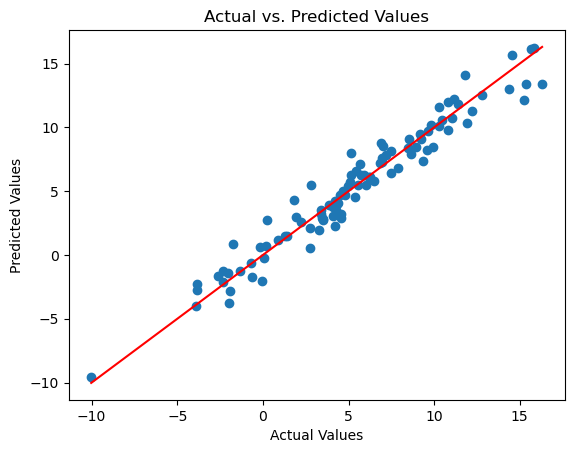

In [16]:
import matplotlib.pyplot as plt

# Create a scatter plot of the actual vs. predicted values
plt.scatter(y, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Plot a diagonal line representing perfect predictions
plt.plot([min(y), max(y)], [min(y), max(y)], color="red")

plt.show()

**(9)** Finally, create the *option* of fitting the model with or without a constant term. In other words, create an option so that, if the user passes a numpy array *without* a constant term, your code will add a vector of 1s before fitting the model. As in `scikit-learn`, make this an option you set during initialization. 

In [17]:
class MyLinearModel:
    def __init__(self, const=True):
        # To initialize the variables that we will use
        self.coefficients = None
        self.std_err = None
        self.r_squared = None
        self.const = const

    def fit(self, X, y):
        # To fit the model

        # Check if X already includes a column of ones
        if self.const:
            # Adding a column of ones to include an intercept in the model - this will be dynamic based on the value of X passed
            X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

        # Getting the coefficients using the matrix multiplication (using linalg.inv for inverting the matrix)
        self.coefficients = np.linalg.solve(X.T @ X, X.T @ y)

        # Calculating the residuals
        residuals = y - X @ self.coefficients

        # Calculating the variance of the error terms
        sigma_sq = np.var(residuals, ddof=X.shape[1])

        # Calculating the standard errors of the estimated coefficients
        self.std_err = np.sqrt(np.diag(sigma_sq * np.linalg.inv(X.T @ X)))

        # Calculating the total sum of squares (tss)
        tss = np.sum((y - np.mean(y)) ** 2)

        # Calculating the residual sum of squares (rss)
        rss = np.sum(residuals**2)

        # Calculating the R-squared value (1 - rss/tss)
        self.r_squared = 1 - (rss / tss)

    def predict(self, X):
        # Check if X already includes a column of ones
        if self.const:
            # Adding a column of ones to include an intercept in the model - this will be dynamic based on the value of X passed
            X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

        # Predicting based on coefficients
        y_pred = X @ self.coefficients

        # Returning the predictions instead of storing them
        return y_pred

In [18]:
# Creating X1 with a column of ones as the first column
X1 = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

# Create an instance of MyLinearModel
model_WithConstant = MyLinearModel(const=False)

# Fit the model to the data with a constant term
model_WithConstant.fit(X1, y)

model = RunMyLinearModel(X, y)
# Printing the predictions
print("----------------------------------------")
print("For the model with Constant False:")
print("Predicted Coefficients:", model.coefficients)
print("Actual Coefficients:", [constant] + real_coefficients.tolist())
print("Standard Error Values:", model.std_err)
print(f"R-squared: {model.r_squared:.3f}")

# Printing the predictions
print("----------------------------------------")
print("For the model with Constant True:")
print("Predicted Coefficients:", model_WithConstant.coefficients)
print("Actual Coefficients:", [constant] + real_coefficients.tolist())
print("Standard Error Values:", model_WithConstant.std_err)
print(f"R-squared: {model_WithConstant.r_squared:.3f}")
print("----------------------------------------")

----------------------------------------
For the model with Constant False:
Predicted Coefficients: [6.89106201 2.01147004 5.0747134 ]
Actual Coefficients: [7, 2, 5]
Standard Error Values: [0.12393877 0.12807298 0.12906425]
R-squared: 0.947
----------------------------------------
For the model with Constant True:
Predicted Coefficients: [6.89106201 2.01147004 5.0747134 ]
Actual Coefficients: [7, 2, 5]
Standard Error Values: [0.12393877 0.12807298 0.12906425]
R-squared: 0.947
----------------------------------------


>Since the values are same for the model witha nd without the constant, we know our code is working!